In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

# T-Testing-

## 📌 One-Sample T-Test Question

A nutritionist claims that the average sodium content in a brand of soup is 500 mg per serving. 

To verify this, a random sample of 10 servings is tested, and the sodium content (in mg) is recorded as:

510, 495, 505, 498, 502, 507, 499, 503, 496, 500

In [2]:
data = np.array([510,495,505,498,502,499,503,496,500])
mu = 500

# one-sample T-test-
t_test,p_value = stats.ttest_1samp(data, mu)

print(f'T-test: {t_test}')
print(f'p_value: {p_value}')

# decision-
alpha = 0.05

if p_value < alpha :
    print('H0: Reject null hypothesis')
else:
    print('H0: Accept null hypothesis')

T-test: 0.5671049640066849
p_value: 0.5861989854908539
H0: Accept null hypothesis


## Titanic Datset-
 
 We’ll compare the average Age of survivors vs. non-survivors using an independent two-sample t-test (because the groups are different).

In [3]:
titanic = sns.load_dataset('titanic')

# Drop missing ages
titanic = titanic.dropna(subset=['age'])

# Split ages into survivors and non-survivors-
age_survived = titanic[titanic['survived'] == 1]['age']
age_not_survived = titanic[titanic['survived'] == 0]['age']

# Perform independent two-sample t-test-
t_stat, p_value = stats.ttest_ind(age_survived, age_not_survived, equal_var=False) 

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference in mean Age between survivors and non-survivors")
else:
    print("Fail to reject H0: No significant difference in mean Age between survivors and non-survivors")
print('--------------------------------------------------------------------------------------------------------')
print(f'Average age of survived passengers on titanic : {np.mean(age_survived)}')
print(f'Average age of not survived passengers on titanic : {np.mean(age_not_survived)}')

T-statistic: -2.046
P-value: 0.041
Reject H0: There is a significant difference in mean Age between survivors and non-survivors
--------------------------------------------------------------------------------------------------------
Average age of survived passengers on titanic : 28.343689655172415
Average age of not survived passengers on titanic : 30.62617924528302


## Question 1-

Testing Average Study Time
A university claims that its students study an average of 15 hours per week. A random sample of 25 students has a mean study time of 14.2 hours with a sample standard deviation of 2.8 hours. At a 5% significance level, is there sufficient evidence to reject the university’s claim?


In [4]:
# Given values
mu = 15
mean = 14.2
s = 2.8
alpha = 0.05
n = 25

# Standard error
se = s / np.sqrt(n)
print(f'Standard error: {se}')

# T-test
t_stat = (mean - mu) / se
print(f'T test: {t_stat}')

# P-value (two-tailed)-
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
print(f'P-value: {p_value}')

# Decision
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Standard error: 0.5599999999999999
T test: -1.42857142857143
P-value: 0.16601358583680859
Fail to reject null hypothesis


## Question 2-

A company claims that its juice bottles contain 500 ml on average.
A sample of 20 bottles has an average volume of 495 ml with a standard deviation of 10 ml. 
Is there evidence at a 5% significance level (α = 0.05) that the average volume differs from 500 ml?


In [5]:
mu = 500
mean = 495
std = 10
alpha = 0.05
n = 20

# standard_error-
standard_error = std/np.sqrt(n)
print(f'standard error : {standard_error}')

# t test-
t = (mean - mu)/standard_error
print(f'T-Test : {t}')

# degree of freedom-
dof = n-1
print(f'Degre of freedom : {dof}')

# P Value-
p_value = 2*(1-stats.t.cdf(abs(t),df = dof))
print(f'P-Value: {p_value}')

if p_value< alpha:
    print('Reject null hypothesis (H0)')
else:
    print('Fail to reject null hypothesis')

standard error : 2.23606797749979
T-Test : -2.23606797749979
Degre of freedom : 19
P-Value: 0.03754054954852504
Reject null hypothesis (H0)


## Question 3-

A school expects its average exam score to be 75.
A sample of 25 students using a new teaching method has an average score of 78 with a standard deviation of 5.
Is there evidence at α = 0.05 that the new teaching method improves scores?

In [6]:
mean = 78
mu = 75
n = 25
std = 5
alpha = 0.05
dof = n-1
# standard_error-
SE = std/np.sqrt(n)
print(f'standard_error :{SE}')

# t-test-
t_test = (mean - mu )/SE
print(f'T Test : {t_test}')

# P value-
p_value = (1-stats.t.cdf(abs(t_test),df = dof))
print(f'P_value :{p_value}')

# Decision-
if p_value < alpha :
    print(f'Reject null hypothesis H0')
else:
    print(f'Fail to Reject null hypothesis H0')

standard_error :1.0
T Test : 3.0
P_value :0.003102868308262341
Reject null hypothesis H0


## On Titanic Dataset-

In [7]:
titanic = sns.load_dataset('titanic')
sample_age = titanic['age']
sample_age = sample_age.dropna()
alpha = 0.05
mean = 35
sample_age

t_test,p_value = stats.ttest_1samp(sample_age,mean)

print(f'T-test :{t_test}')
print(f'P-Value :{p_value}')

# decision-
if p_value < alpha:
    print('Reject Null Hypothesis H0')
else:
    print('Fail to reject null Hypothesis H0')
    
sample_age.mean()

T-test :-9.750712756513316
P-Value :3.590209195469345e-21
Reject Null Hypothesis H0


np.float64(29.69911764705882)

## Question 4-

One-Sample t-test: A company claims that their new energy drink increases reaction time by at least 0.1 seconds compared to a standard benchmark of 0.5 seconds. A sample of 20 volunteers who consumed the drink has a mean reaction time of 0.58 seconds with a standard deviation of 0.09 seconds. Conduct a one-sample t-test to determine if the company’s claim is supported at a 5% significance level. Specify the null and alternative hypotheses and the conclusion.

In [8]:
mu = 0.6
mean = 0.58
n = 20
std = 0.09
alpha = 0.05
dof = n-1
# standard error-
se = std/np.sqrt(n)
print(f'standard_error: {se}')

# T-Test-
t_test = (mean - mu)/se
print(f'T_Test : {t_test}')

# p value -
p_value = stats.t.cdf(t_test,df=19)
print(f'P_Value : {p_value}')

# Decision-
if p_value < alpha :
    print('Reject Null hypothesis')
else:
    print('Fail to reject Null hypothesis')



standard_error: 0.020124611797498106
T_Test : -0.9938079899999075
P_Value : 0.16640262865501088
Fail to reject Null hypothesis


## 📌 Two sample T-Test Question


### Question 1-

A researcher wants to compare the average test scores of two groups of students (Group A and Group B)
who used different study methods. Group A has 25 students with a mean score of 78 and a standard deviation of 10. 
Group B has 30 students with a mean score of 82 and a standard deviation of 12. 
Formulate the null and alternative hypotheses,
and determine whether there is a significant difference in the mean scores between the two groups at a 5% significance level.
Assume equal variances

In [9]:
n_A , n_B = 25,30
mean_A , mean_B = 78,82
std_A , std_B =10,12
alpha = 0.05

t_stat, p_value = stats.ttest_ind_from_stats(mean_A,std_A,n_A,mean_B,std_B,n_B,equal_var = True)

print(f'T_Test : {t_stat}')
print(f'p_value : {p_value}')

if p_value<alpha:
    print('Reject null hypothesis H0')
else:
    print('Fail to reject null hypothesis')

T_Test : -1.3260695749411513
p_value : 0.19050334294956325
Fail to reject null hypothesis


## Q2. Students’ Exam Scores

Two classes (Class A and Class B) appeared for the same math exam.

Class A scores: [78, 85, 82, 90, 76, 80, 79, 88]

Class B scores: [72, 75, 70, 68, 74, 73, 71, 69]

👉 Test whether there is a significant difference in average exam scores between the two classes (α = 0.05).

In [10]:
class_A = [78,85,82,90,76,80,79,88]
class_B = [72,75,70,68,74,73,71,69]
alpha =0.05

#length of data-
n_A = len(class_A)
n_B = len(class_B)

# calculating mean-
class_A_mean =np.mean(class_A)
class_B_mean =np.mean(class_B)

print(f'Mean of class_A : {class_A_mean}')
print(f'Mean of class_B : {class_B_mean}')

# calculating std-
class_A_std = np.std(class_A)
class_B_std = np.std(class_B)

print(f'standard_deviation of class_A : {class_A_std}')
print(f'standard_deviation of class_B : {class_B_std}')

# checking normality-
shapiro_class_A = stats.shapiro(class_A)
shapiro_class_B = stats.shapiro(class_B)
print('------------------------------------')

print(f'Shapiro of class_A: {shapiro_class_A}')
print(f'Shapiro of class_B: {shapiro_class_B}')
print('--------------------------------------')

#checking variance-
levene = stats.levene(class_A,class_B)
print(f'Levene of class A and B: {levene}')

# T Test-
t_stat,p_value = stats.ttest_ind_from_stats(class_A_mean,class_A_std,n_A,class_B_mean,class_B_std,n_B)
print(f'T Test : {t_stat}')
print(f'P_Value : {p_value}')

# Decision-
if p_value<alpha:
    print('Reject null hypothesis (H0)')
else:
    print('Fail to reject null hypothesis (H1)')

Mean of class_A : 82.25
Mean of class_B : 71.5
standard_deviation of class_A : 4.656984002549289
standard_deviation of class_B : 2.29128784747792
------------------------------------
Shapiro of class_A: ShapiroResult(statistic=np.float64(0.9439549687069316), pvalue=np.float64(0.6503626990409227))
Shapiro of class_B: ShapiroResult(statistic=np.float64(0.9748582563729322), pvalue=np.float64(0.933165192106493))
--------------------------------------
Levene of class A and B: LeveneResult(statistic=np.float64(3.2941176470588234), pvalue=np.float64(0.09100661411304416))
T Test : 5.858343248295476
P_Value : 4.158138186879166e-05
Reject null hypothesis (H0)


## Q-4: Comparing Conversion Rates for Two Email Marketing Campaigns
Context: An e-commerce company tests two email marketing campaigns (A and B) to promote a new product. They measure the conversion rate (proportion of recipients who make a purchase) for 30 email batches sent to independent customer groups.
Dataset (Conversion Rates, as decimals):

In [11]:
# Data -
Campaign_A = [0.04, 0.05, 0.03, 0.06, 0.02, 0.04, 0.05, 0.03, 0.04, 0.06, 0.05, 0.03, 0.04, 0.05, 0.02, 0.06, 0.04, 0.03, 0.05, 0.04, 0.03, 0.06, 0.05, 0.04, 0.03, 0.05, 0.04, 0.06, 0.03, 0.05]
Campaign_B = [0.07, 0.08, 0.06, 0.09, 0.07, 0.06, 0.08, 0.07, 0.06, 0.09, 0.08, 0.07, 0.06, 0.08, 0.07, 0.09, 0.06, 0.08, 0.07, 0.06, 0.08, 0.09, 0.07, 0.06, 0.08, 0.07, 0.06, 0.09, 0.07, 0.08]

# mean-
mean_A = np.mean(Campaign_A)
mean_B = np.mean(Campaign_B)
print(f'mean of Campaign_A : {mean_A}')
print(f'mean of Campaign_B : {mean_B}')
print('----------------------------------')

# std-
std_A = np.std(Campaign_A)
std_B = np.std(Campaign_B) 
print(f'stadard deviation of Campaign_A :{std_A}')
print(f'stadard deviation of Campaign_B :{std_B}')

# length of data-
n_A = len(Campaign_A)
n_B = len(Campaign_B)

#checking normality-
shapiro_Campaign_A = stats.shapiro(Campaign_A)
shapiro_Campaign_B = stats.shapiro(Campaign_B)
print(f'Campaign_A :{shapiro_Campaign_A}')
print(f'Campaign_B :{shapiro_Campaign_B}')

# checking variance-
levene = stats.levene(Campaign_A,Campaign_B)
print(levene)

# Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(Campaign_B, Campaign_A, equal_var=False, alternative='greater')
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Decision
if p_value < 0.05:
    print("Reject H₀: Campaign B has significantly higher conversion rate.")
else:
    print("Fail to reject H₀: No significant difference in conversion rates.")

mean of Campaign_A : 0.04233333333333334
mean of Campaign_B : 0.07333333333333333
----------------------------------
stadard deviation of Campaign_A :0.011742609969205692
stadard deviation of Campaign_B :0.01043498389499902
Campaign_A :ShapiroResult(statistic=np.float64(0.9155623583398154), pvalue=np.float64(0.02060813992617794))
Campaign_B :ShapiroResult(statistic=np.float64(0.8705348641549422), pvalue=np.float64(0.0017218098341261416))
LeveneResult(statistic=np.float64(0.3059788980070357), pvalue=np.float64(0.5822842060141811))
T-statistic: 10.627, P-value: 0.000
Reject H₀: Campaign B has significantly higher conversion rate.


## Comparing Inference Times of Two ML Models
Context: A data science team compares inference times of two machine learning models (XGBoost and Neural Network) for a real-time fraud detection system. They measure inference time (in milliseconds) for 25 transactions each.
Dataset (Inference Times, ms):

### Question 5:
Does XGBoost have a significantly lower mean inference time than the Neural Network at a 1% significance level (α = 0.01)? Assume equal variances.
Hypotheses:

Null (H₀): Mean inference time (XGBoost) ≥ Mean inference time (Neural Network).
Alternative (H₁): Mean inference time (XGBoost) < Mean inference time (Neural Network) (one-tailed).

In [12]:
XGBoost = [12.1, 11.8, 12.3, 12.0, 11.9, 12.2, 11.7, 12.4, 12.0, 11.8, 12.3, 11.9, 12.1, 12.2, 11.7, 12.0, 11.8, 12.3, 11.9, 12.1, 12.0, 11.8, 12.2, 11.9, 12.0]
Neural_Network = [14.2, 14.0, 14.5, 14.1, 13.9, 14.3, 14.0, 14.4, 14.1, 13.8, 14.2, 14.0, 14.3, 14.1, 13.9, 14.2, 14.0, 14.4, 14.1, 13.8, 14.3, 14.0, 14.2, 14.1, 13.9]
alpha = 0.01

# checking Normality-
shapiro_X =stats.shapiro(XGBoost)
shapiro_N =stats.shapiro(Neural_Network)
print(shapiro_X)
print(shapiro_N)

# checking variance-
levene = stats.levene(XGBoost,Neural_Network)
print(levene)

# T test-
t_test,p = ttest_ind(XGBoost,Neural_Network,equal_var=True,alternative ='less')
print(f'T Test : {t_test}')
print(f'P_Value : {p}')

if p_value < alpha:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

ShapiroResult(statistic=np.float64(0.953342872454118), pvalue=np.float64(0.29779538331453204))
ShapiroResult(statistic=np.float64(0.9648642288830608), pvalue=np.float64(0.5195433806108181))
LeveneResult(statistic=np.float64(0.138817480719793), pvalue=np.float64(0.7110995677455194))
T Test : -38.26754935102762
P_Value : 6.345995228961078e-38
reject null hypothesis


## Comparing Customer Satisfaction for Two Store Locations
Context: A retail chain compares customer satisfaction scores (1–10 scale) between two store locations (Downtown and Suburban) to assess service quality. They collect scores from 20 customers at each location.
Dataset (Satisfaction Scores):

Downtown: [7, 8, 6, 7, 9, 8, 7, 6, 8, 7, 9, 8, 6, 7, 8, 7, 6, 9, 8, 7]

Suburban: [6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5]

### Question 6:
Is there a significant difference in mean satisfaction scores between Downtown and Suburban stores at a 5% significance level (α = 0.05)? Assume unequal variances.
Hypotheses:

Null (H₀): Mean satisfaction score (Downtown) = Mean satisfaction score (Suburban).
Alternative (H₁): Mean satisfaction scores differ (two-tailed).

In [71]:
Downtown = [7, 8, 6, 7, 9, 8, 7, 6, 8, 7, 9, 8, 6, 7, 8, 7, 6, 9, 8, 7]
Suburban =[6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5]
alpha = 0.05

# mean-
Downtown_mean = np.mean(Downtown)
Suburban_mean = np.mean(Suburban)

# std-
Downtown_std = np.std(Downtown)
Suburban_std = np.std(Suburban)

# checking normality-
shapiro_Downtown = stats.shapiro(Downtown)
shapiro_Suburban = stats.shapiro(Suburban)
print(f'shapiro of Downtown : {shapiro_Downtown}')
print(f'shapiro of Suburban : {shapiro_Suburban}')

# checking variance--
levene = stats.levene(Downtown,Suburban)
print(levene)

t_test,p_value = ttest_ind(Downtown,Suburban, equal_var =True)
print(f'P_value : {p_value/2}')
print(f't_test : {t_test}')

if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('fail to reject null hypothesis')

shapiro of Downtown : ShapiroResult(statistic=np.float64(0.8881525908925305), pvalue=np.float64(0.024873364362826268))
shapiro of Suburban : ShapiroResult(statistic=np.float64(0.8092095568192651), pvalue=np.float64(0.0011891891001692154))
LeveneResult(statistic=np.float64(1.6784452296819785), pvalue=np.float64(0.20294620231366808))
P_value : 1.081967579351734e-06
t_test : 5.5772414154124785
Reject null hypothesis


# Practice Questions-

## 1. Dataset for a Two-Sample T-Test
Scenario: A researcher is studying whether a new teaching method improves math test scores for high school students compared to a traditional method. Two groups of students are tested: one using the new method and one using the traditional method.
Data:

Group A (New Teaching Method): Math test scores (out of 100) for 20 students.

78, 82, 85, 88, 76, 90, 92, 81, 84, 87, 79, 83, 86, 89, 91, 80, 77, 85, 88, 90


Group B (Traditional Method): Math test scores (out of 100) for 20 students.

70, 74, 76, 72, 78, 75, 73, 71, 77, 79, 80, 74, 76, 73, 78, 72, 70, 75, 77, 74


Suggested Use:

Test: Two-sample t-test (independent samples).
Purpose: Compare the mean test scores of the two groups to determine if the new teaching method significantly improves scores.
Assumptions: Assume the scores are normally distributed and variances are equal (you can test for equal variances using an F-test if needed).
Hypotheses:

Null (H₀): The mean scores of the two groups are equal (μ₁ = μ₂).
Alternative (H₁): The mean score of the new method is higher (μ₁ > μ₂, one-tailed test).

mean of Group_A : 84.55
mean of Group_B : 74.7
standard_deviation of Group_A : 4.893335962521403
standard_deviation of Group_B : 2.9217874846167646
checking normality : ShapiroResult(statistic=np.float64(0.9572838708392419), pvalue=np.float64(0.49111811682147927))
checking normality : ShapiroResult(statistic=np.float64(0.9709916951582578), pvalue=np.float64(0.7756710595310544))
Checking Variance : LeveneResult(statistic=np.float64(5.787692307692306), pvalue=np.float64(0.021111583869029546))
T-Test : 7.729166486961222
P_Value : 2.5938426198335873e-09
Reject the nnull hypothesis


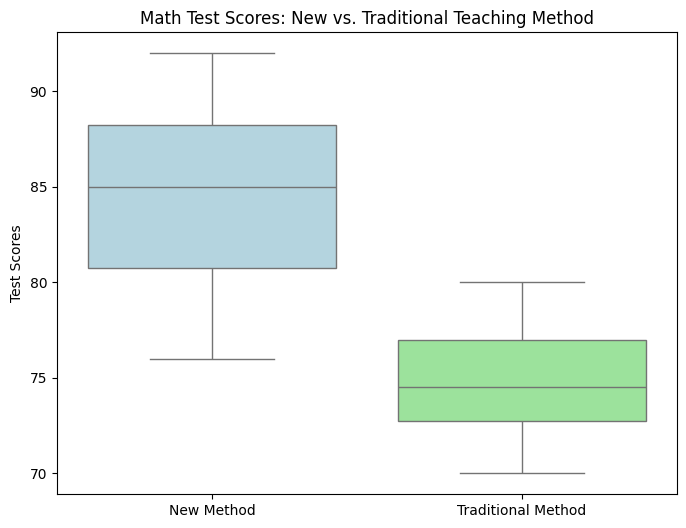

In [67]:
# Group A & B -
Group_A = [78, 82, 85, 88, 76, 90, 92, 81, 84, 87, 79, 83, 86, 89, 91, 80, 77, 85, 88, 90]
Group_B = [70, 74, 76, 72, 78, 75, 73, 71, 77, 79, 80, 74, 76, 73, 78, 72, 70, 75, 77, 74]
alpha = 0.05
# calculating mean -
print(f'mean of Group_A : {np.mean(Group_A)}')
print(f'mean of Group_B : {np.mean(Group_B)}')

# calculating std-
print(f'standard_deviation of Group_A : {np.std(Group_A,ddof=1)}')
print(f'standard_deviation of Group_B : {np.std(Group_B,ddof=1)}')

# checking normality-
print(f'checking normality : {stats.shapiro(Group_A)}')
print(f'checking normality : {stats.shapiro(Group_B)}')

# checking variance-
print(f'Checking Variance : {stats.levene(Group_A,Group_B)}')

# T-Test-
T_test,p_Value = ttest_ind(Group_A,Group_B,equal_var=True,alternative = 'two-sided')
print(f'T-Test : {T_test}')
print(f'P_Value : {p_Value}')

# Decision -
if p_Value<alpha:
    print('Reject the nnull hypothesis')
else:
    print('Fail to reject null hypothesis')

# Visualization-
plt.figure(figsize=(8, 6))
sns.boxplot(data=[Group_A, Group_B], palette=["lightblue", "lightgreen"])
plt.xticks([0, 1], ['New Method', 'Traditional Method'])
plt.ylabel('Test Scores')
plt.title('Math Test Scores: New vs. Traditional Teaching Method')
plt.show()

## 2. Dataset for a One-Sample T-Test
Scenario: A nutritionist claims that a new diet plan results in an average weight loss of 5 kg after 8 weeks. A sample of 15 participants follows the diet, and their weight loss is recorded.
Data:

Weight loss (in kg) for 15 participants:

4.8, 5.2, 4.9, 5.5, 4.3, 5.7, 4.6, 5.0, 4.7, 5.3, 4.4, 5.1, 4.9, 5.4, 4.5


Claimed population mean (μ₀): 5 kg

In [41]:
# data-
Data = [4.8, 5.2, 4.9, 5.5, 4.3, 5.7, 4.6, 5.0, 4.7, 5.3, 4.4, 5.1, 4.9, 5.4, 4.5]
mu = 5
alpha = 0.05

# mean/std-
sample_mean = np.mean(Data)
sample_std =  np.std(Data,ddof =1)
sample_size = len(Data)
print(f'Mean of data: {sample_mean}')  #mean
print(f'std of data: {sample_std}')   #std

# T-Test (perform one sample ttest)-
T_test01,p_value01 = ttest_1samp(Data,mu)
print(f'T-Test: {T_test01}')
print(f'p_Value: {p_value01}')

# decision -
if p_value01 < alpha:
    print('Reject Null hypothesis')
else:
    print('Fail to reject null hypothesis')

Mean of data: 4.953333333333334
std of data: 0.4155317877932646
T-Test: -0.4349588362008335
p_Value: 0.6702223277503041
Fail to reject null hypothesis


## 3. Dataset for a Z-Test (One-Sample)
Scenario: A factory produces light bulbs with a claimed average lifespan of 1000 hours. A quality control team tests a large sample of 50 bulbs to verify this claim. The population standard deviation is known to be 50 hours (based on historical data).
Data:

Sample mean lifespan: 990 hours
Sample size: 50 bulbs
Population mean (μ₀): 1000 hours
Population standard deviation (σ): 50 hours

In [59]:
# Data-
sample_mean = 990
population_mean = 1000
sample_std = 50
sample_size = 50

#calculating standard_Error-
SE = sample_std/np.sqrt(sample_size)
print(f'Standard_error :{SE}')

# Z Test-
Z_Score = (sample_mean - population_mean)/SE
print(f'Z_Score : {Z_Score}')

# calculating 2-tailed p-Value-
p_value = 2*(1-stats.norm.cdf(abs(Z_Score)))
print(f'P_Value : {p_value}')

# Decision-
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

Standard_error :7.071067811865475
Z_Score : -1.4142135623730951
P_Value : 0.157299207050285
Fail to reject null hypothesis


## 4. One-Sample Z-Test (Mean)

A company claims that the average life of their bulbs = 1000 hours.
A sample of 50 bulbs is taken, mean = 980 hours, population standard deviation = 80 hours.
At 5% significance, test whether the company’s claim is valid.

In [66]:
sample_mean = 980
population_mean = 1000
sample_std = 80
alpha = 0.05
sample_size = 50

# standard_error-
se = sample_std/np.sqrt(sample_size)
print(f'standard_error : {se}')

# Z-Test-
z_test = (sample_mean - population_mean)/se
print(f'Z Test : {z_test}')

# p_value-
p_value = 2*(1-stats.norm.cdf(abs(z_test)))
print(f'P_value : {p_value}')

# decision-
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

standard_error : 11.31370849898476
Z Test : -1.7677669529663689
P_value : 0.0770998717435416
Fail to reject null hypothesis


## 5. Paired T-Test Example: Does a New Study Technique Improve Exam Scores?
Context: A school tests a new study technique on 10 students. Each student takes a math exam before and after using the technique for 6 weeks. We want to determine if the technique significantly improves scores.
Data (Exam scores out of 100):

Before: 75, 68, 82, 70, 78, 72, 80, 76, 74, 79
After: 80, 72, 85, 74, 81, 77, 84, 80, 78, 83

Hypotheses:

Null (H₀): The mean difference in scores (after - before) is zero (μ_d = 0).
Alternative (H₁): The mean difference in scores is greater than zero (μ_d > 0, one-tailed test).

In [84]:
# data-
Before = [75, 68, 82, 70, 78, 72, 80, 76, 74, 79]
After = [80, 72, 85, 74, 81, 77, 84, 80, 78, 83]
population_mean = 0

# differences -
differences = [a - b for a, b in zip(After, Before)]
print(f'Differences : {differences}')

# T_Test / P_Value -
T_test,P_Value = ttest_rel(After,Before)
print(f'T_Test : {T_test}')
print(f'P_Value : {P_Value/2}')

# decision-
alpha = 0.05
if P_Value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Differences : [5, 4, 3, 4, 3, 5, 4, 4, 4, 4]
T_Test : 18.973665961010276
P_Value : 7.221071158113476e-09
Reject null hypothesis
